In [1]:
using MeshTools, Meshes, MeshViz, CairoMakie

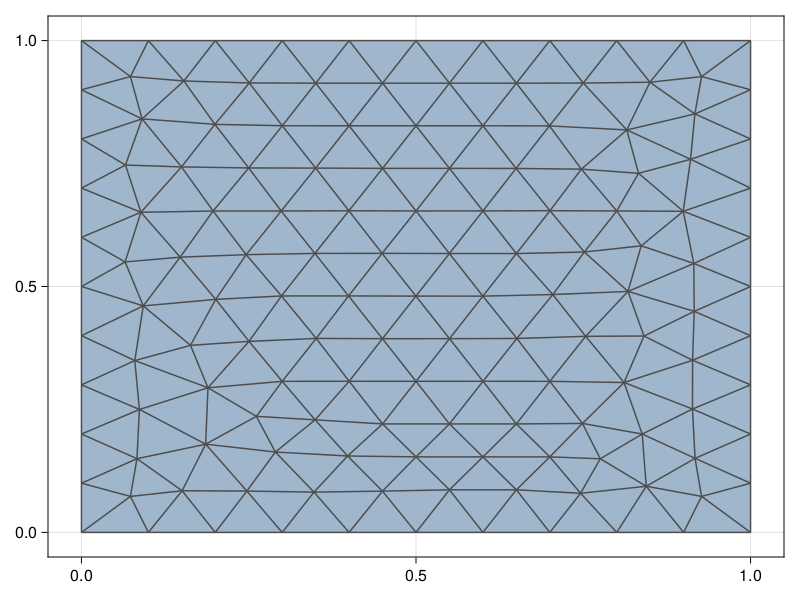

In [2]:
outer = [(0.0,0.0),(1.0,0.0),(1.0,1.0),(0.0,1.0),(0.0,0.0)] # last point is optional

mesh = create_mesh(outer; outer_length=0.1)
quad_mesh = refine(mesh,QuadRefinement())

viz(mesh,showfacets=true)

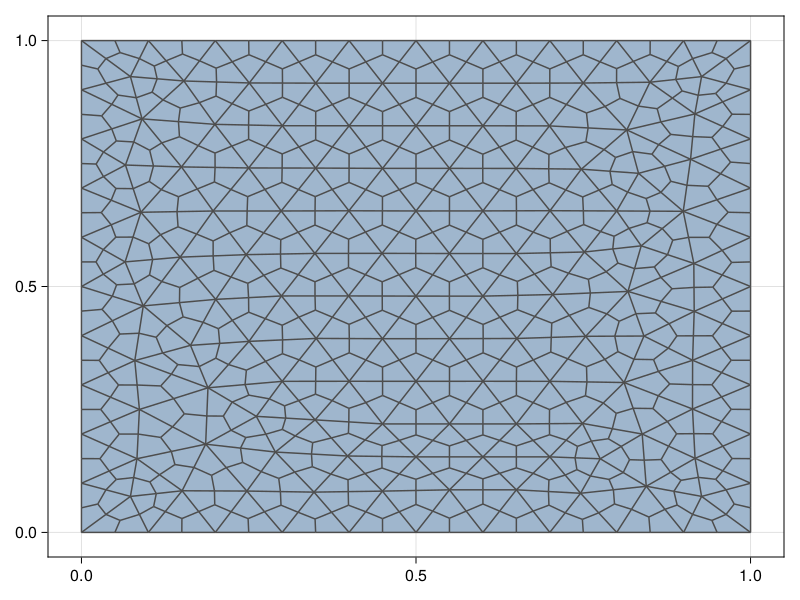

In [3]:
viz(quad_mesh,showfacets=true)

In [4]:
err = abs(sum(measure(t) for t in elements(mesh)) - integrate((x,y)->1,mesh))
println("|Integration Error|: $err")

|Integration Error|: 1.1641509978232989e-9


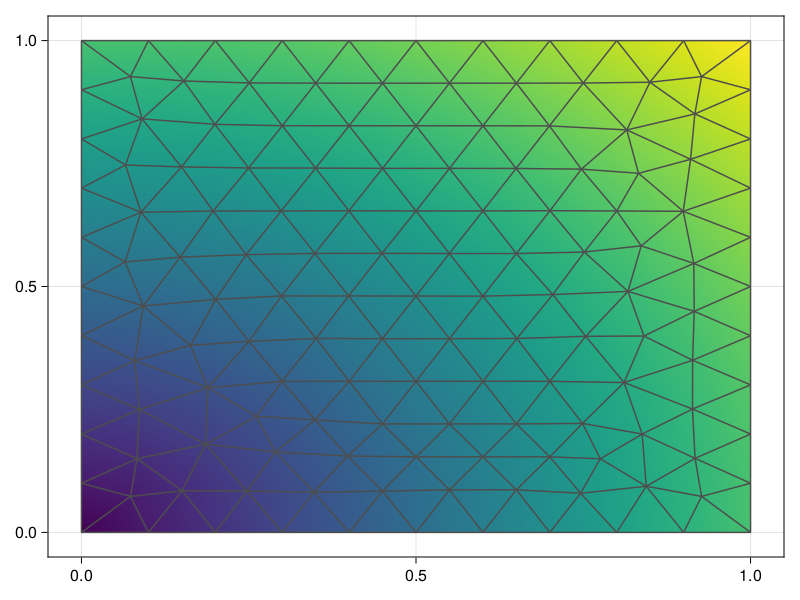

In [5]:
f(x,y) = hypot(x,y)
viz(mesh,showfacets=true,color=[f(coordinates(v)...) for v in vertices(mesh)])

In [6]:
F_true = (sqrt(2) + asinh(1))/3
F_tri = integrate(f, mesh)
F_quad = integrate(f,quad_mesh)
(F_true,F_tri,F_quad)

(0.7651957164642127, 0.7651955863796535, 0.7651957069547595)

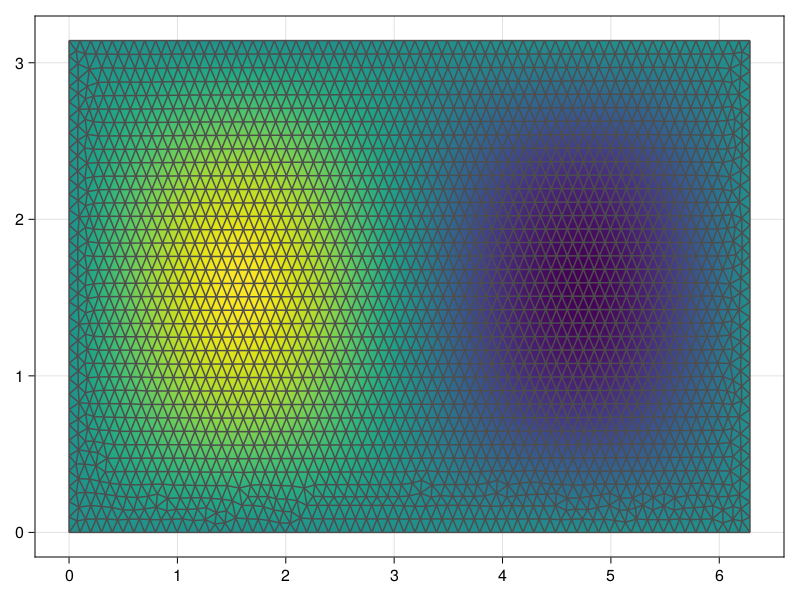

In [7]:
f(x,y) = sin(x)*sin(y)
outer = [(0.0,0.0),(2pi,0.0),(2pi,1pi),(0.0,1pi),(0.0,0.0)] # 1*pi to make it a Float64

mesh = create_mesh(outer; outer_length=0.1)
quad_mesh = refine(mesh,QuadRefinement())

viz(mesh,showfacets=true,color=[f(coordinates(v)...) for v in vertices(mesh)])

In [8]:
F_true = 0.0
F_tri = integrate(f, mesh)
F_quad = integrate(f,quad_mesh)
(F_true, F_tri,F_quad)

(0.0, -2.9491384078198478e-9, -7.950971195929617e-10)

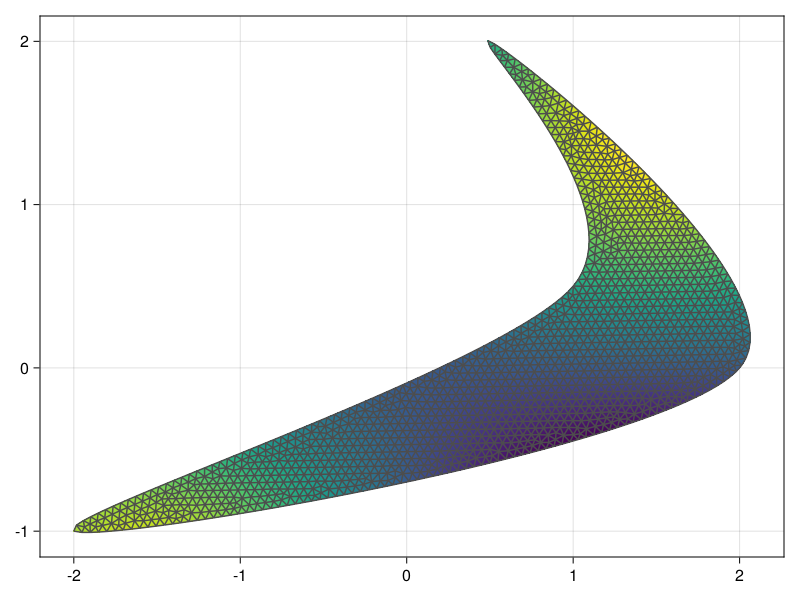

In [9]:
outer = [(-2.0,-1.0), (1.0,0.5), (0.5,2.0), (2.0,0.0)]

mesh =  create_mesh(outer; outer_length=0.05,spline=true)
quad_mesh = refine(mesh,QuadRefinement())
viz(mesh,showfacets=true,color=[f(coordinates(v)...) for v in vertices(mesh)])

In [10]:
err = abs(sum(measure(t) for t in elements(mesh)) - integrate((x,y)->1,mesh))
println("|Integration Error|: $err")

|Integration Error|: 6.938935044331629e-7


In [11]:
F_tri = integrate(f, mesh)
F_quad = integrate(f,quad_mesh)
(F_tri,F_quad)

(0.7741601684262048, 0.7741601640012931)